<a href="https://colab.research.google.com/github/rahulyad011/intrusion-detection/blob/main/NIDS1_KDD_model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model
import pickle # saving and loading trained model
from os import path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# importing library for support vector machine classifier
from sklearn.svm import SVC

# MLP requirements 
from keras.layers import Dense # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.models import model_from_json # saving and loading trained model

# LSTM requirements 
from keras.layers import LSTM
from keras.layers import Input
from keras.models import Model

# evaluation metrices
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# representation of model layers
from keras.utils.vis_utils import plot_model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
bin_data_total = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/nids_project_data/bin_data_processed.csv')
bin_data_total.drop(bin_data_total.columns[0],axis=1,inplace=True)
bin_data_total

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,binary_label
0,0,1,0,0,0,0,0,0,0,0,...,0.098039,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,0,1,0,0,0,0,0,0,0,...,0.003922,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,0,0,0,0,0,0,0,0,...,0.101961,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,0,0,0,0,0,0,0,0,...,1.000000,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,0,0,0,0,0,0,0,0,...,1.000000,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,1,0,0,0,0,0,0,0,0,...,0.098039,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,0
125969,0,0,1,0,0,0,0,0,0,0,...,0.956863,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,1
125970,0,1,0,0,0,0,0,0,0,0,...,0.117647,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,1
125971,0,1,0,0,0,0,0,0,0,0,...,0.031373,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0


In [ ]:
# distribution of label class before sampling
data_size = bin_data_total.shape[0]
# data_size
bin_data_total.binary_label.value_counts()/data_size

1    0.534583
0    0.465417
Name: binary_label, dtype: float64

In [ ]:
# sampling data taking only 20% of the data
# bin_data = bin_data_total.groupby('binary_label', group_keys=False).apply(lambda x: x.sample(frac=0.2))
bin_data = bin_data_total

In [ ]:
# distribution of label class after sampling
data_size = bin_data.shape[0]
bin_data.binary_label.value_counts()/data_size

1    0.534583
0    0.465417
Name: binary_label, dtype: float64

In [ ]:
model_selection = {
    0 : "ALL",
    1 : "SVM",
    2 : "MLP",
    3 : "LSTM",
    4 : "AE"
}
model_flag = 0

In [ ]:
model_name_suffix = "_nids_kdd"

## **Linear Support Vector Machine Classifier (Binary Classification)**

In [ ]:
X = bin_data.iloc[:,0:122].to_numpy() # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = bin_data['binary_label'] # target attribute

In [ ]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42) 

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "SVM":
  # using kernel as linear 
  lsvm = SVC(kernel='linear',gamma='auto') 
  lsvm.fit(X_train,y_train) # training model on training dataset

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "SVM":
  pkl_filename = "/content/drive/MyDrive/Colab_Notebooks/Models/lsvm_binary"+model_name_suffix+".pkl"
  if (not path.isfile(pkl_filename)):
    # saving the trained model to disk
    with open(pkl_filename, 'wb') as file:
      pickle.dump(lsvm, file)
    print("Saved model to disk")
    # loading the trained model from disk
    with open(pkl_filename, 'rb') as file:
      lsvm = pickle.load(file)
    print("Loaded model from disk") 

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "SVM":
  y_pred = lsvm.predict(X_test) # predicting target attribute on testing dataset
  ac = accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
  print("LSVM-Classifier Binary Set-Accuracy is ", ac)

LSVM-Classifier Binary Set-Accuracy is  97.28837238839144


In [ ]:
# import matplotlib.pyplot as plt
# from sklearn.datasets import make_classification
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# from sklearn.model_selection import train_test_split
# from sklearn.svm import SVC
# X, y = make_classification(random_state=0)
# X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                     random_state=0)
# cm = confusion_matrix(y_test, y_pred, labels=lsvm.classes_)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,
#                               display_labels=lsvm.classes_)
# disp.plot()

# plt.show()

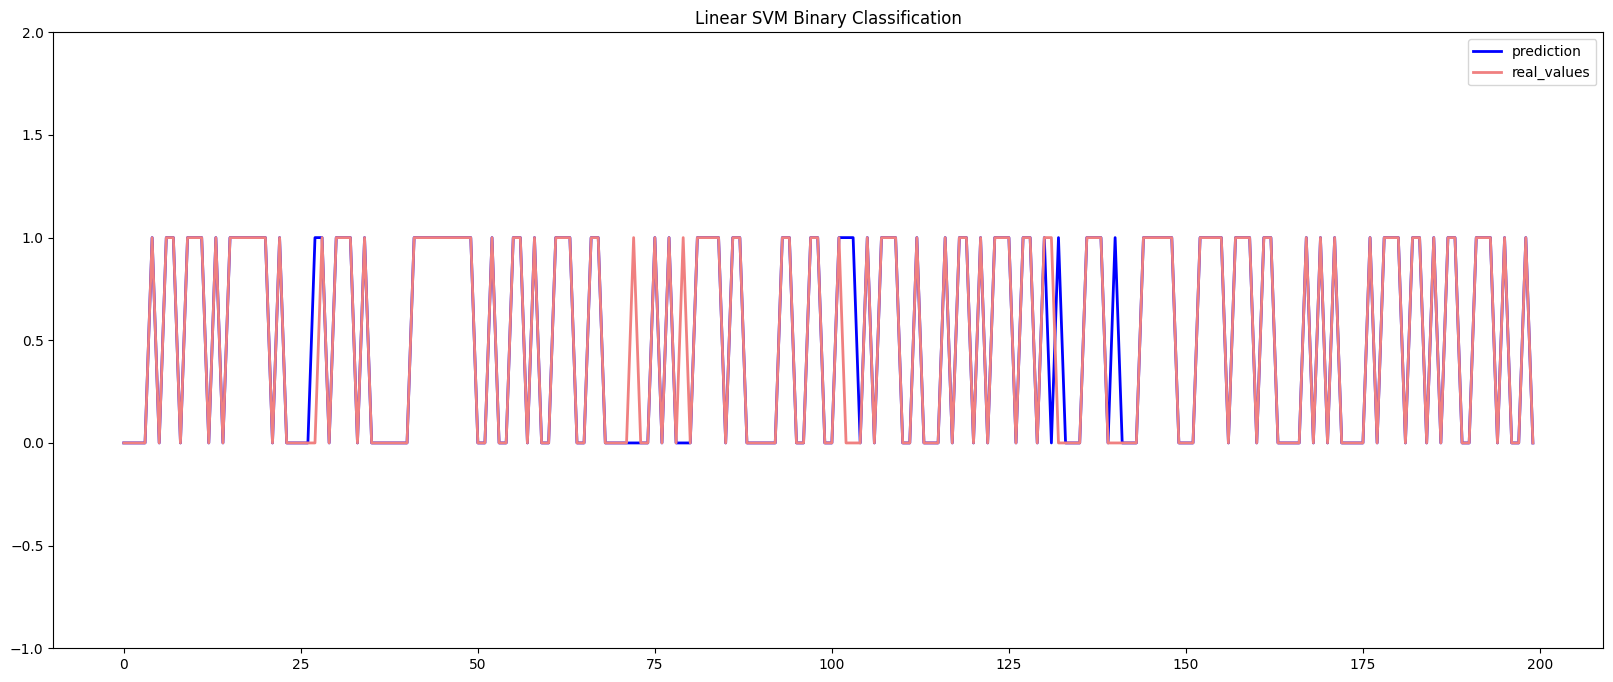

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "SVM":
  plt.figure(figsize=(20,8))
  plt.plot(y_pred[300:500], label="prediction", linewidth=2.0,color='blue')
  plt.plot(y_test[300:500].values, label="real_values", linewidth=2.0,color='lightcoral')
  plt.legend(loc="best")
  plt.ylim((-1,2))
  plt.title("Linear SVM Binary Classification")
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/lsvm_real_pred_bin.png')
  plt.show()

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "SVM":
  target_names = ['class 0', 'class 1']
  print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.98      0.96      0.97     14720
     class 1       0.97      0.98      0.97     16774

    accuracy                           0.97     31494
   macro avg       0.97      0.97      0.97     31494
weighted avg       0.97      0.97      0.97     31494



## **Multi Layer Perceptron Classifier (Binary Classification)**

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  mlp = Sequential() # creating model

  # adding input layer and first layer with 50 neurons
  mlp.add(Dense(units=50, input_dim=X_train.shape[1], activation='relu'))
  # output layer with sigmoid activation
  mlp.add(Dense(units=1,activation='sigmoid'))

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # defining loss function, optimizer, metrics and then compiling model
  mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # summary of model layers
  mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                6150      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 6,201
Trainable params: 6,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # training the model on training dataset
  history = mlp.fit(X_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

Epoch 1/100
16/16 [==============================] - 1s 22ms/step - loss: 0.5929 - accuracy: 0.6706 - val_loss: 0.4951 - val_accuracy: 0.8830
Epoch 2/100
16/16 [==============================] - 0s 10ms/step - loss: 0.4313 - accuracy: 0.9009 - val_loss: 0.3616 - val_accuracy: 0.9173
Epoch 3/100
16/16 [==============================] - 0s 12ms/step - loss: 0.3143 - accuracy: 0.9364 - val_loss: 0.2658 - val_accuracy: 0.9585
Epoch 4/100
16/16 [==============================] - 0s 24ms/step - loss: 0.2335 - accuracy: 0.9626 - val_loss: 0.2039 - val_accuracy: 0.9661
Epoch 5/100
16/16 [==============================] - 0s 18ms/step - loss: 0.1828 - accuracy: 0.9680 - val_loss: 0.1659 - val_accuracy: 0.9681
Epoch 6/100
16/16 [==============================] - 0s 10ms/step - loss: 0.1518 - accuracy: 0.9699 - val_loss: 0.1434 - val_accuracy: 0.9696
Epoch 7/100
16/16 [==============================] - 0s 11ms/step - loss: 0.1334 - accuracy: 0.9711 - val_loss: 0.1295 - val_accuracy: 0.9706
Epoch 

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  filepath = '/content/drive/MyDrive/Colab_Notebooks/Models/mlp_binary'+model_name_suffix+'.json'
  weightspath = '/content/drive/MyDrive/Colab_Notebooks/Weights/mlp_binary'+model_name_suffix+'.h5'
  if (not path.isfile(filepath)):
    # serialize model to JSON
    mlp_json = mlp.to_json()
    with open(filepath, "w") as json_file:
      json_file.write(mlp_json)

    # serialize weights to HDF5
    mlp.save_weights(weightspath)
    print("Saved model to disk")

    # load json and create model
    json_file = open(filepath, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    mlp = model_from_json(loaded_model_json)

    # load weights into new model
    mlp.load_weights(weightspath)
    print("Loaded model from disk")

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # defining loss function, optimizer, metrics and then compiling model
  mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # predicting target attribute on testing dataset
  test_results = mlp.evaluate(X_test, y_test, verbose=1)
  print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}')

985/985 [==============================] - 1s 1ms/step - loss: 0.0407 - accuracy: 0.9849
Test results - Loss: 0.04074949026107788 - Accuracy: 98.494952917099


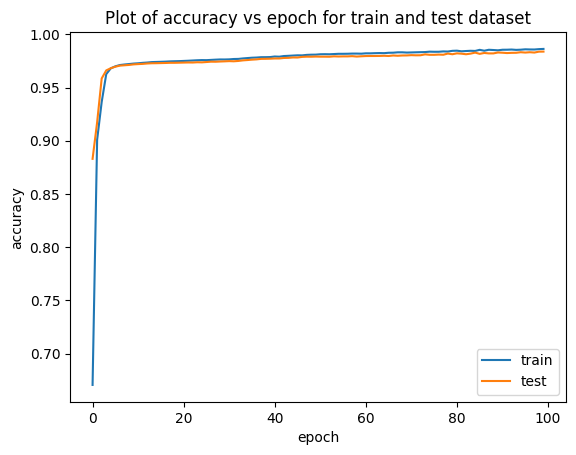

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":  
  # Plot of accuracy vs epoch of train and test dataset
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title("Plot of accuracy vs epoch for train and test dataset")
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/mlp_binary_accuracy.png')
  plt.show()

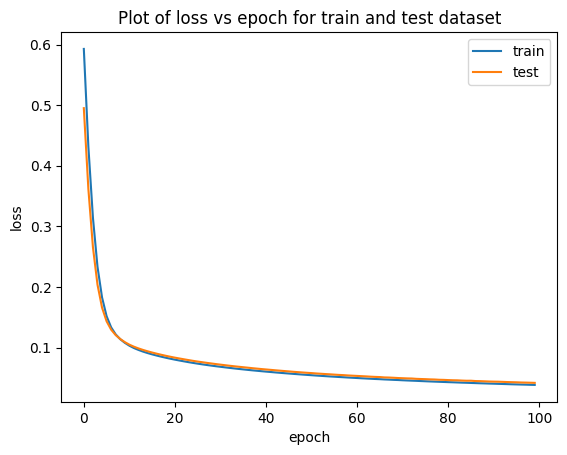

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # Plot of loss vs epoch of train and test dataset
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Plot of loss vs epoch for train and test dataset')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/mlp_binary_loss.png')
  plt.show()

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # representation of model layers
  from keras.utils.vis_utils import plot_model
  plot_model(mlp, to_file='/content/drive/MyDrive/Colab_Notebooks/Plots/mlp_binary.png', show_shapes=True,)

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  y_pred = mlp.predict(X_test).ravel()
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  auc = auc(fpr, tpr)

985/985 [==============================] - 1s 1ms/step


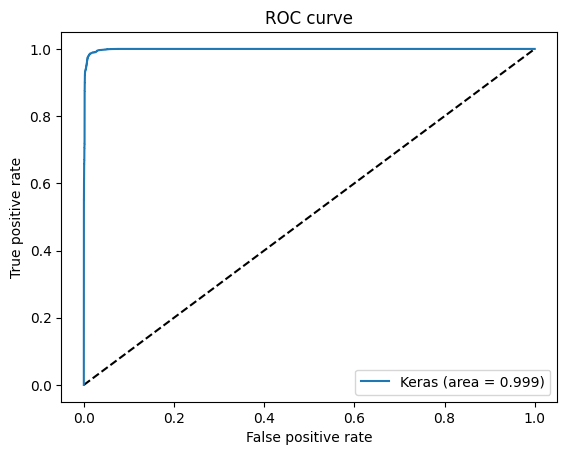

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.title('ROC curve')
  plt.legend(loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/mlp_binary_roc.png')
  plt.show()

In [ ]:
# real_data_kdd = bin_data.copy()

# # Names of the columns that are discrete
# cat_cols = real_data_kdd.select_dtypes(['object']).columns
# # cat_cols
# test_data = real_data_kdd.iloc[:999]

# corr= test_data.corr()
# corr_y = abs(corr['binary_label'])
# highest_corr = corr_y
# highest_corr.sort_values(ascending=True)

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  y_classes = (mlp.predict(X_test)>0.5).astype('int32')

985/985 [==============================] - 1s 987us/step


In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  print("Recall Score - ",recall_score(y_test,y_classes))
  print("F1 Score - ",f1_score(y_test,y_classes))
  print("Precision Score - ",precision_score(y_test,y_classes))

Recall Score -  0.9894479551687135
F1 Score -  0.9859213496495188
Precision Score -  0.9824197940097076


              precision    recall  f1-score   support

           0       0.99      0.98      0.98     14720
           1       0.98      0.99      0.99     16774

    accuracy                           0.98     31494
   macro avg       0.99      0.98      0.98     31494
weighted avg       0.98      0.98      0.98     31494



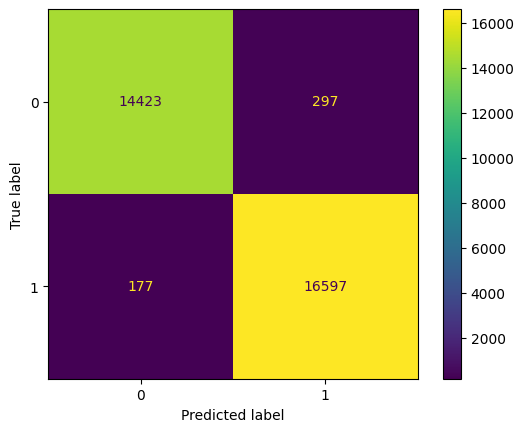

In [ ]:
print(classification_report(y_test, y_classes, target_names=['0', '1']))
cm = confusion_matrix(y_test, y_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['0', '1'])
disp.plot()

plt.show()

In [ ]:
corr= bin_data.corr()
corr_y = abs(corr['binary_label'])
highest_corr = corr_y[corr_y >0.5]
highest_corr.sort_values(ascending=True)

service_http                0.562312
count                       0.576444
srv_serror_rate             0.648289
flag_S0                     0.650206
serror_rate                 0.650652
dst_host_serror_rate        0.651842
dst_host_srv_serror_rate    0.654985
logged_in                   0.690171
dst_host_same_srv_rate      0.693803
dst_host_srv_count          0.722535
same_srv_rate               0.751913
flag_SF                     0.756286
binary_label                1.000000
Name: binary_label, dtype: float64

## **LSTM Classifier**

In [ ]:
X_train.shape  # (18896, 122)
# y_train.shape   #(18896,)

(94479, 122)

In [ ]:
y_train = np.array(y_train)
type(y_train)

numpy.ndarray

In [ ]:
x_train = np.reshape(X_train, (X_train.shape[0],1,X_train.shape[1]))
x_train.shape

(94479, 1, 122)

In [ ]:
x_test = np.reshape(X_test, (X_test.shape[0],1,X_test.shape[1]))
x_test.shape

(31494, 1, 122)

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  lst = Sequential()
  # input layer and LSTM layer with 50 neurons
  lst.add(LSTM(50,input_dim=122))

  # outpute layer with sigmoid activation
  lst.add(Dense(1,activation='sigmoid'))

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # defining loss function, optimizer, metrics and then compiling model
  lst.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # summary of model layers
  lst.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                34600     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 34,651
Trainable params: 34,651
Non-trainable params: 0
_________________________________________________________________


In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # training the model on training dataset
  history = lst.fit(x_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

Epoch 1/100
16/16 [==============================] - 3s 59ms/step - loss: 0.6402 - accuracy: 0.8372 - val_loss: 0.5831 - val_accuracy: 0.9482
Epoch 2/100
16/16 [==============================] - 0s 29ms/step - loss: 0.5359 - accuracy: 0.9437 - val_loss: 0.4754 - val_accuracy: 0.9306
Epoch 3/100
16/16 [==============================] - 0s 27ms/step - loss: 0.4263 - accuracy: 0.9306 - val_loss: 0.3672 - val_accuracy: 0.9322
Epoch 4/100
16/16 [==============================] - 0s 28ms/step - loss: 0.3243 - accuracy: 0.9392 - val_loss: 0.2776 - val_accuracy: 0.9483
Epoch 5/100
16/16 [==============================] - 1s 35ms/step - loss: 0.2464 - accuracy: 0.9551 - val_loss: 0.2160 - val_accuracy: 0.9589
Epoch 6/100
16/16 [==============================] - 1s 42ms/step - loss: 0.1950 - accuracy: 0.9643 - val_loss: 0.1770 - val_accuracy: 0.9663
Epoch 7/100
16/16 [==============================] - 1s 41ms/step - loss: 0.1623 - accuracy: 0.9687 - val_loss: 0.1525 - val_accuracy: 0.9690
Epoch 

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  filepath = '/content/drive/MyDrive/Colab_Notebooks/Models/lst_binary'+model_name_suffix+'.json'
  weightspath = '/content/drive/MyDrive/Colab_Notebooks/Weights/lst_binary'+model_name_suffix+'.h5'
  if (not path.isfile(filepath)):
    # serialize model to JSON
    lst_json = lst.to_json()
    with open(filepath, "w") as json_file:
      json_file.write(lst_json)

    # serialize weights to HDF5
    lst.save_weights(weightspath)
    print("Saved model to disk")

    # load json and create model
    json_file = open(filepath, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    lst = model_from_json(loaded_model_json)

    # load weights into new model
    lst.load_weights(weightspath)
    print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # load json and create model
  json_file = open(filepath, 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  lst = model_from_json(loaded_model_json)

  # load weights into new model
  lst.load_weights(weightspath)
  print("Loaded model from disk")

Loaded model from disk


In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # defining loss function, optimizer, metrics and then compiling model
  lst.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # predicting target attribute on testing dataset
  test_results = lst.evaluate(x_test, y_test, verbose=1)
  print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

985/985 [==============================] - 2s 2ms/step - loss: 0.0429 - accuracy: 0.9843
Test results - Loss: 0.0429425872862339 - Accuracy: 98.4314501285553%


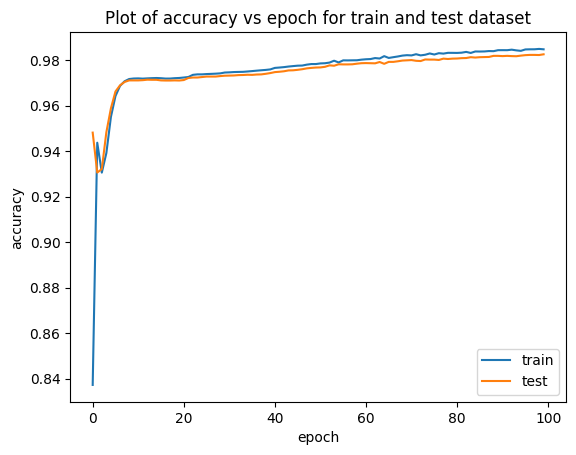

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # Plot of accuracy vs epoch of train and test dataset
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title("Plot of accuracy vs epoch for train and test dataset")
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/lstm_binary_accuracy.png')
  plt.show()

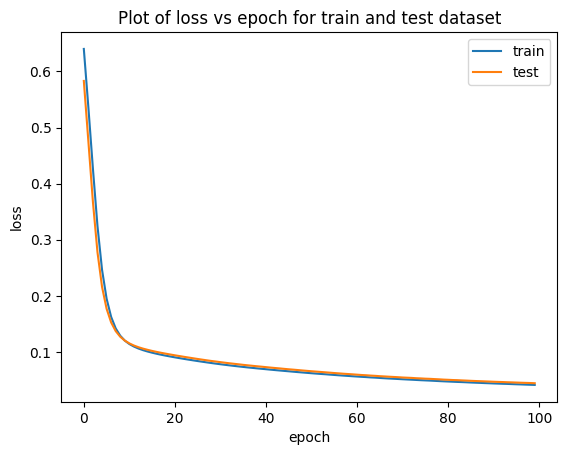

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # Plot of loss vs epoch of train and test dataset
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title("Plot of loss vs epoch for train and test dataset")
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/lstm_binary_loss.png')
  plt.show()

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # representation of model layers
  plot_model(lst, to_file='/content/drive/MyDrive/Colab_Notebooks/Plots/lstm_binary.png', show_shapes=True,)

In [ ]:
y_test = np.array(y_test)
y_test.shape

(31494,)

In [ ]:
type(y_test)

numpy.ndarray

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  y_classes = (lst.predict(x_test)>0.5).astype('int32')

985/985 [==============================] - 2s 2ms/step


In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  print("Recall Score - ",recall_score(y_test,y_classes))
  print("F1 Score - ",f1_score(y_test,y_classes))
  print("Precision Score - ",precision_score(y_test,y_classes))

Recall Score -  0.9893883390962204
F1 Score -  0.9853351540699399
Precision Score -  0.9813150425733207


              precision    recall  f1-score   support

           0       0.99      0.98      0.98     14720
           1       0.98      0.99      0.99     16774

    accuracy                           0.98     31494
   macro avg       0.98      0.98      0.98     31494
weighted avg       0.98      0.98      0.98     31494



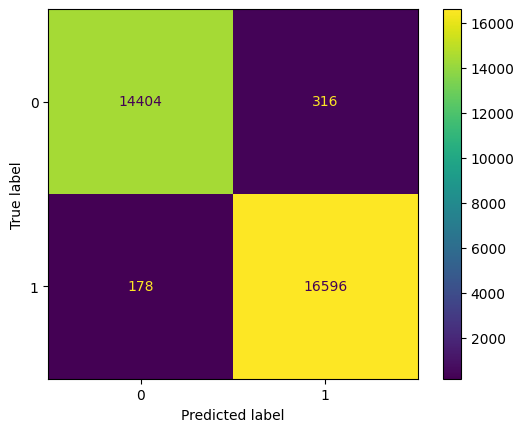

In [ ]:
print(classification_report(y_test, y_classes, target_names=['0', '1']))
cm = confusion_matrix(y_test, y_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['0', '1'])
disp.plot()

plt.show()

## **Auto Encoder**

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # splitting the dataset 75% for training and 25% testing
  X_train, X_test = train_test_split(bin_data, test_size=0.25, random_state=42)

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # dataset excluding target attribute (encoded, one-hot-encoded,original)
  X_train = X_train.drop(['binary_label'],axis=1) 

  y_test = X_test['binary_label'] # target attribute

  # dataset excluding target attribute (encoded, one-hot-encoded,original)
  X_test = X_test.drop(['binary_label'],axis=1)

  X_train = X_train.values
  X_test = X_test.values
  y_test = y_test.values

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  input_dim = X_train.shape[1]
  encoding_dim = 50

  #input layer
  input_layer = Input(shape=(input_dim, ))
  #encoding layer with 50 neurons
  encoder = Dense(encoding_dim, activation="relu")(input_layer)           
  #decoding and output layer
  output_layer = Dense(input_dim, activation='softmax')(encoder)

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # creating model with input, encoding, decoding, output layers
  autoencoder = Model(inputs=input_layer, outputs=output_layer)

  # defining loss function, optimizer, metrics and then compiling model
  autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # summary of model layers
  autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 122)]             0         
                                                                 
 dense_3 (Dense)             (None, 50)                6150      
                                                                 
 dense_4 (Dense)             (None, 122)               6222      
                                                                 
Total params: 12,372
Trainable params: 12,372
Non-trainable params: 0
_________________________________________________________________


In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # training the model on training dataset
  history = autoencoder.fit(X_train, X_train, epochs=100,batch_size=500,validation_data=(X_test, X_test)).history

Epoch 1/100
189/189 [==============================] - 2s 8ms/step - loss: 0.0528 - accuracy: 0.3862 - val_loss: 0.0483 - val_accuracy: 0.2778
Epoch 2/100
189/189 [==============================] - 1s 6ms/step - loss: 0.0478 - accuracy: 0.1740 - val_loss: 0.0477 - val_accuracy: 0.1808
Epoch 3/100
189/189 [==============================] - 1s 5ms/step - loss: 0.0476 - accuracy: 0.1432 - val_loss: 0.0476 - val_accuracy: 0.1325
Epoch 4/100
189/189 [==============================] - 1s 5ms/step - loss: 0.0475 - accuracy: 0.1354 - val_loss: 0.0476 - val_accuracy: 0.1313
Epoch 5/100
189/189 [==============================] - 1s 5ms/step - loss: 0.0475 - accuracy: 0.1447 - val_loss: 0.0475 - val_accuracy: 0.1072
Epoch 6/100
189/189 [==============================] - 1s 5ms/step - loss: 0.0474 - accuracy: 0.1414 - val_loss: 0.0475 - val_accuracy: 0.1048
Epoch 7/100
189/189 [==============================] - 1s 5ms/step - loss: 0.0474 - accuracy: 0.1477 - val_loss: 0.0474 - val_accuracy: 0.1195

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  filepath = '/content/drive/MyDrive/Colab_Notebooks/Models/ae_binary'+model_name_suffix+'.json'
  weightspath = '/content/drive/MyDrive/Colab_Notebooks/Weights/ae_binary'+model_name_suffix+'.h5'
  if (not path.isfile(filepath)): 
    # serialize model to JSON
    autoencoder_json = autoencoder.to_json()
    with open(filepath, "w") as json_file:
      json_file.write(autoencoder_json)

    # serialize weights to HDF5
    autoencoder.save_weights(weightspath)
    print("Saved model to disk")

    # load json and create model
    json_file = open(filepath, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    autoencoder = model_from_json(loaded_model_json)

    # load weights into new model
    autoencoder.load_weights(weightspath)
    print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # defining loss function, optimizer, metrics and then compiling model
  autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # predicting target attribute on testing dataset
  test_results = autoencoder.evaluate(X_test, X_test, verbose=1)
  print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

985/985 [==============================] - 1s 1ms/step - loss: 0.0473 - accuracy: 0.1768
Test results - Loss: 0.047343287616968155 - Accuracy: 0.1767955869436264%


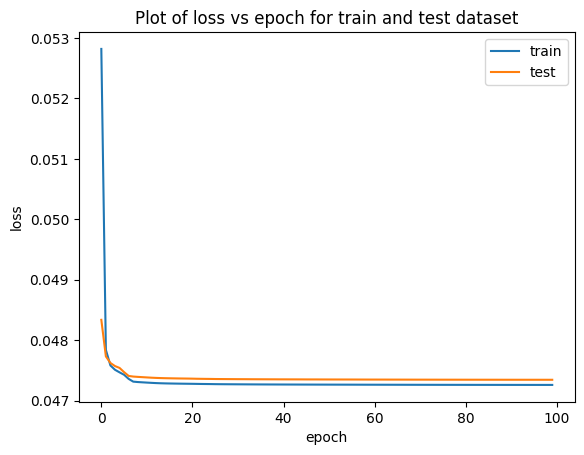

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # Plot of loss vs epoch of train and test dataset
  plt.plot(history['loss'])
  plt.plot(history['val_loss'])
  plt.title("Plot of loss vs epoch for train and test dataset")
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper right')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/ae_binary_loss.png')
  plt.show()

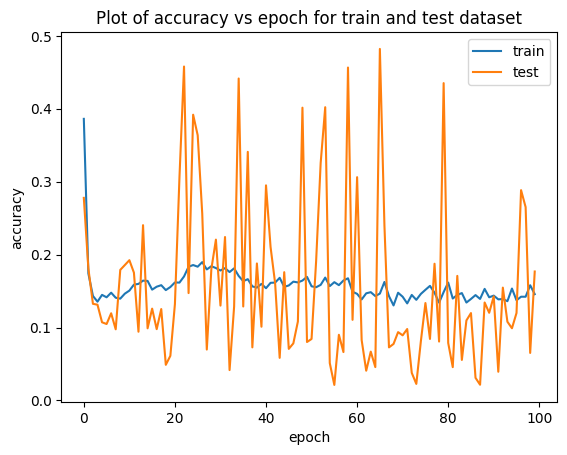

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # Plot of accuracy vs epoch of train and test dataset
  plt.plot(history['accuracy'])
  plt.plot(history['val_accuracy'])
  plt.title("Plot of accuracy vs epoch for train and test dataset")
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/ae_binary_accuracy.png')
  plt.show()

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # representation of model layers
  plot_model(autoencoder, to_file='/content/drive/MyDrive/Colab_Notebooks/Plots/ae_binary.png', show_shapes=True,)

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # calculating reconstruction error 
  predictions = autoencoder.predict(X_test)

985/985 [==============================] - 1s 1ms/step


In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  mse = np.mean(np.power(X_test - predictions, 2), axis=1)
  error_df = pd.DataFrame({'reconstruction_error': mse,
                           'true_class': y_test})

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  error_df.describe()
  print(predictions.shape)

(31494, 122)


## **AE Classifier**

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  i_dim = predictions.shape[1]

  #input layer
  i_layer = Input(shape=(i_dim, ))
  #hidden layer with 50 neurons
  fvector = Dense(50, activation="sigmoid")(i_layer)                    
  #doutput layer
  o_layer = Dense(1, activation='sigmoid')(fvector)

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # creating model with input, encoding, decoding, output layers
  ae_classifier = Model(inputs=i_layer, outputs=o_layer)

  # defining loss function, optimizer, metrics and then compiling model
  ae_classifier.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # summary of model layers
  ae_classifier.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 122)]             0         
                                                                 
 dense_5 (Dense)             (None, 50)                6150      
                                                                 
 dense_6 (Dense)             (None, 1)                 51        
                                                                 
Total params: 6,201
Trainable params: 6,201
Non-trainable params: 0
_________________________________________________________________


In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # training the model on training dataset
  his = ae_classifier.fit(predictions, y_test, epochs=300,batch_size=500, validation_split=0.2).history

Epoch 1/300
51/51 [==============================] - 1s 6ms/step - loss: 0.7493 - accuracy: 0.4832 - val_loss: 0.6711 - val_accuracy: 0.8841
Epoch 2/300
51/51 [==============================] - 0s 3ms/step - loss: 0.6560 - accuracy: 0.8052 - val_loss: 0.6401 - val_accuracy: 0.8124
Epoch 3/300
51/51 [==============================] - 0s 3ms/step - loss: 0.6278 - accuracy: 0.8491 - val_loss: 0.6116 - val_accuracy: 0.8862
Epoch 4/300
51/51 [==============================] - 0s 3ms/step - loss: 0.5991 - accuracy: 0.8823 - val_loss: 0.5813 - val_accuracy: 0.8862
Epoch 5/300
51/51 [==============================] - 0s 3ms/step - loss: 0.5682 - accuracy: 0.8841 - val_loss: 0.5485 - val_accuracy: 0.9008
Epoch 6/300
51/51 [==============================] - 0s 3ms/step - loss: 0.5349 - accuracy: 0.8955 - val_loss: 0.5131 - val_accuracy: 0.9013
Epoch 7/300
51/51 [==============================] - 0s 3ms/step - loss: 0.4999 - accuracy: 0.8953 - val_loss: 0.4766 - val_accuracy: 0.9013
Epoch 8/300
5

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  filepath = '/content/drive/MyDrive/Colab_Notebooks/Models/ae_classifier_binary.json'
  weightspath = '/content/drive/MyDrive/Colab_Notebooks/Weights/ae_classifier_binary.h5'
  if (not path.isfile(filepath)): 
    # serialize model to JSON
    ae_classifier_json = ae_classifier.to_json()
    with open(filepath, "w") as json_file:
      json_file.write(ae_classifier_json)

    # serialize weights to HDF5
    ae_classifier.save_weights(weightspath)
    print("Saved model to disk")

    # load json and create model
    json_file = open(filepath, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    ae_classifier = model_from_json(loaded_model_json)

    # load weights into new model
    ae_classifier.load_weights(weightspath)
    print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  ae_classifier.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # predicting target attribute on testing dataset
  test_results = ae_classifier.evaluate(X_test, y_test, verbose=1)
  print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

985/985 [==============================] - 2s 1ms/step - loss: 0.5534 - accuracy: 0.9004
Test results - Loss: 0.553398847579956 - Accuracy: 90.0361955165863%


In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # representation of model layers
  plot_model(ae_classifier, to_file='/content/drive/MyDrive/Colab_Notebooks/Plots/ae_classifier_binary.png', show_shapes=True)

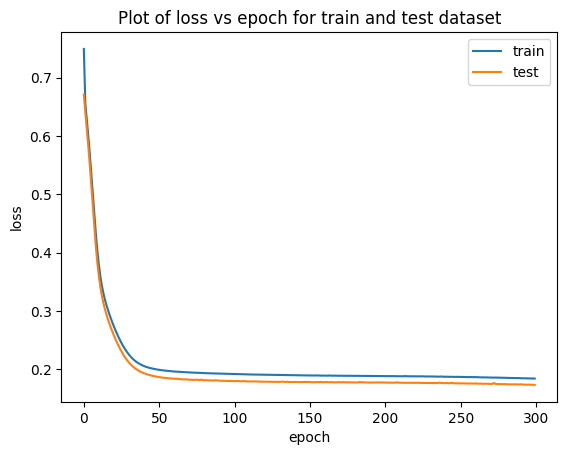

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # Plot of loss vs epoch of train and test dataset
  plt.plot(his['loss'])
  plt.plot(his['val_loss'])
  plt.title("Plot of loss vs epoch for train and test dataset")
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper right')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/ae_classifier_binary_loss.png')
  plt.show()

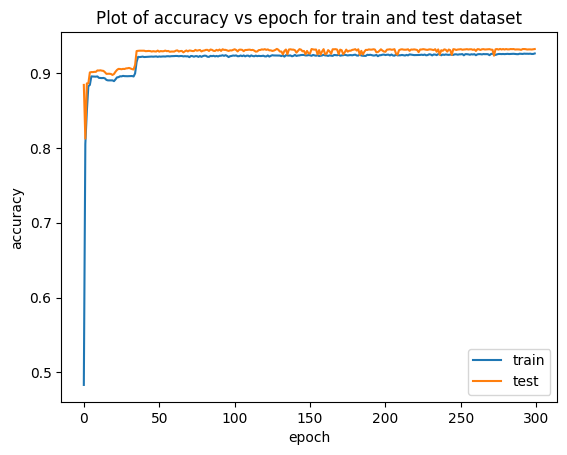

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # Plot of accuracy vs epoch of train and test dataset
  plt.plot(his['accuracy'])
  plt.plot(his['val_accuracy'])
  plt.title("Plot of accuracy vs epoch for train and test dataset")
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/ae_classifier_binary_accuracy.png')
  plt.show()

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  y_pred = ae_classifier.predict(X_test).ravel()
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  #auc = auc(fpr, tpr)

985/985 [==============================] - 1s 1ms/step


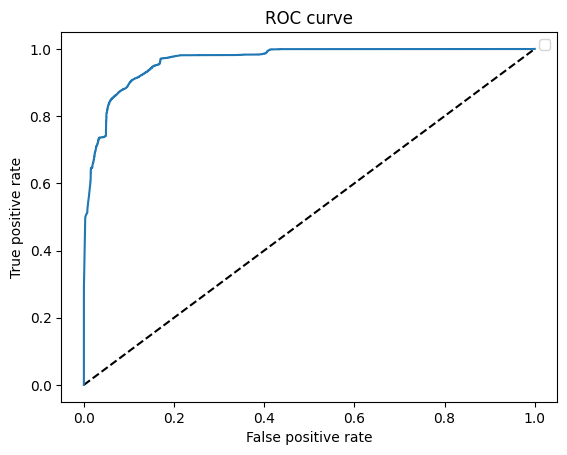

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  plt.plot([0, 1], [0, 1], 'k--')
  #plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
  plt.plot(fpr, tpr)
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.title('ROC curve')
  plt.legend(loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/ae_binary_roc.png')
  plt.show()

In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  pred = ae_classifier.predict(X_test)
  y_classes = (ae_classifier.predict(X_test)>0.5).astype('int32')

985/985 [==============================] - 1s 942us/step


In [ ]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  print("Recall Score - ",recall_score(y_test,y_classes))
  print("F1 Score - ",f1_score(y_test,y_classes))
  print("Precision Score - ",precision_score(y_test,y_classes))

Recall Score -  0.9456897579587457
F1 Score -  0.9099931161083066
Precision Score -  0.8768933112216695


              precision    recall  f1-score   support

           0       0.93      0.85      0.89     14720
           1       0.88      0.95      0.91     16774

    accuracy                           0.90     31494
   macro avg       0.90      0.90      0.90     31494
weighted avg       0.90      0.90      0.90     31494



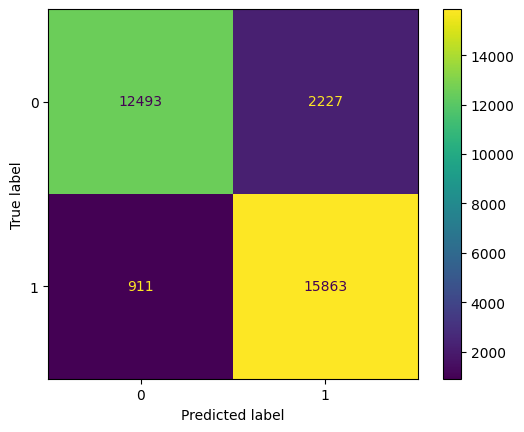

In [ ]:
print(classification_report(y_test, y_classes, target_names=['0', '1']))
cm = confusion_matrix(y_test, y_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['0', '1'])
disp.plot()

plt.show()